# How to make simple API request

In [1]:
import requests #to request API 
import pandas as pd # import pandas dataframe in a short form 'pd'
import numpy as np # import numpy in a shoprt form 'np' 
import matplotlib.pyplot as plt # Import matplotlib library to create graphs
from datetime import datetime #import datetime function 

In [2]:
# making API request
response = requests.get('http://api.cal-adapt.org/api/series/tasmax_year_CanESM2_rcp85/rasters/')
data = response.json() #get the response in json format
data # quickly look at what we got from our request

{'count': 95,
 'next': 'http://api.cal-adapt.org/api/series/tasmax_year_CanESM2_rcp85/rasters/?page=2',
 'previous': None,
 'results': [{'event': '2006-01-01',
   'geom': {'coordinates': [[[-124.5625, 31.5625],
      [-113.375, 31.5625],
      [-113.375, 43.75],
      [-124.5625, 43.75],
      [-124.5625, 31.5625]]],
    'type': 'Polygon'},
   'height': 195,
   'id': 8336,
   'image': 'http://api.cal-adapt.org/media/img/tasmax_year_CanESM2_rcp85_r1i1p1_2006.LOCA_2016-04-02.16th.CA_NV.tif',
   'maxval': 306.0705261230469,
   'minval': 277.35174560546875,
   'name': 'yearly average maximum temperature CanESM2 RCP 8.5',
   'nodata': 1.0000000150474662e+30,
   'slug': 'tasmax_year_CanESM2_rcp85_2006',
   'srs': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]',
   'tileurl': 'http://api.cal-adapt.org/tiles/tasmax_year_CanESM2_rcp85_2

In [17]:
# we don't need anything but 'results' (look at the data above)
#filtering out only results from 'data'
results = data['results']

In [4]:
# Create a pandas dataframe, so we can read it and work with it
df = pd.DataFrame(results)
df.head(5) #printing only first 5 rows of data

,event,geom,height,id,image,maxval,minval,name,nodata,slug,srs,tileurl,units,url,width,xpixsize,ypixsize
0,2006-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,8336,http://api.cal-adapt.org/media/img/tasmax_year...,306.070526,277.351746,yearly average maximum temperature CanESM2 RCP...,1.000000e+30,tasmax_year_CanESM2_rcp85_2006,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Can...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
1,2007-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,8337,http://api.cal-adapt.org/media/img/tasmax_year...,307.355164,278.537201,yearly average maximum temperature CanESM2 RCP...,1.000000e+30,tasmax_year_CanESM2_rcp85_2007,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Can...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2,2008-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,8338,http://api.cal-adapt.org/media/img/tasmax_year...,307.247101,277.355255,yearly average maximum temperature CanESM2 RCP...,1.000000e+30,tasmax_year_CanESM2_rcp85_2008,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Can...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
3,2009-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,8339,http://api.cal-adapt.org/media/img/tasmax_year...,307.282013,278.675964,yearly average maximum temperature CanESM2 RCP...,1.000000e+30,tasmax_year_CanESM2_rcp85_2009,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Can...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
4,2010-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,8340,http://api.cal-adapt.org/media/img/tasmax_year...,306.418884,277.578674,yearly average maximum temperature CanESM2 RCP...,1.000000e+30,tasmax_year_CanESM2_rcp85_2010,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_Can...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625


### Specify the Point that we need the data for

In [5]:
params = {
    'pagesize': 100,
    'g': '{"type":"Point","coordinates":[-121.4687,38.5938]}'
}
url_yearly = 'http://api.cal-adapt.org/api/series/tasmax_year_CNRM-CM5_rcp85/rasters/'
url_daily = 'http://api.cal-adapt.org/api/series/tasmax_day_CNRM-CM5_rcp85/rasters/'

# Add HTTP header
headers = {'ContentType': 'json'}

# Make request
response_yearly = requests.get(url_yearly, params=params, headers=headers)
response_daily = requests.get(url_daily, params=params, headers=headers)

data_yearly = response_yearly.json()
data_daily = response_daily.json()



## 1. To get yearly average data

##### The image column points to the value of a climate variable for a particular grid cell. The maxval and minval refer to max and min values of the climate variable across all grid cells for that particular time slice. 

In [7]:
results_yearly = data_yearly['results']
df_yearly = pd.DataFrame(results_yearly)
df_yearly.head()

,event,geom,height,id,image,maxval,minval,name,nodata,slug,srs,tileurl,units,url,width,xpixsize,ypixsize
0,2006-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10616,297.332214,306.819061,277.567169,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp85_2006,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
1,2007-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10617,298.116241,306.532562,278.417511,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp85_2007,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2,2008-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10618,298.264252,306.744751,277.854126,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp85_2008,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
3,2009-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10619,298.392548,306.831024,278.398743,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp85_2009,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
4,2010-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10620,297.840973,306.799347,278.454041,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp85_2010,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625


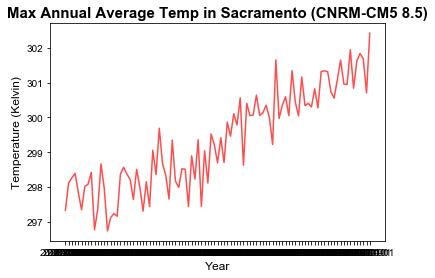

In [8]:
plt.plot(df_yearly.event, df_yearly.image,  alpha = 0.7, color='red')
plt.style.use('seaborn-whitegrid')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Kelvin)', fontsize = 12)
plt.title('Max Annual Average Temp in Sacramento (CNRM-CM5 8.5)', weight = 'bold', fontsize = 15)
plt.rcParams['figure.figsize'] = [16, 10]
plt.show()

## 2. To get daily data

In [9]:
data_daily

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'event': '2006-01-01',
   'geom': {'coordinates': [[[-124.5625, 31.5625],
      [-113.375, 31.5625],
      [-113.375, 43.75],
      [-124.5625, 43.75],
      [-124.5625, 31.5625]]],
    'type': 'Polygon'},
   'height': 195,
   'id': 7454,
   'image': [[[288.3806457519531]],
    [[288.22314453125]],
    [[288.10321044921875]],
    [[285.4710388183594]],
    [[285.9130859375]],
    [[291.1368103027344]],
    [[285.9771728515625]],
    [[285.5881652832031]],
    [[282.2184753417969]],
    [[288.8060302734375]],
    [[291.6032409667969]],
    [[290.3104553222656]],
    [[284.85845947265625]],
    [[287.6507263183594]],
    [[288.0799865722656]],
    [[288.73248291015625]],
    [[285.7590026855469]],
    [[286.6329650878906]],
    [[285.45355224609375]],
    [[289.3782958984375]],
    [[291.0281982421875]],
    [[293.43865966796875]],
    [[292.2489013671875]],
    [[287.690185546875]],
    [[289.4944152832031]],
    [[292.9272766

In [10]:
results_daily = data_daily['results'][0]
values_arr = np.array(results_daily['image']).flatten()
df_daily = pd.DataFrame(values_arr)
df_daily.head()

,0
0,288.380646
1,288.223145
2,288.103210
3,285.471039
4,285.913086


##### Organizing daily data with date-time 

In [11]:
start_date = datetime.strptime(results_daily['event'], '%Y-%m-%d')
    
# Get total number of values -> number of days
length = len(df_daily)
    
    # Create new pandas dataframe and map each value in list to a date index
df_daily = pd.DataFrame(values_arr,
    index=pd.date_range(start_date, freq='1D', periods=length),
    columns=['value'])

col_name = results_daily['slug'].split('_')[0] + str("_") + results_daily['slug'].split('_')[2]
df_daily.columns = [col_name]


In [12]:
df_daily.head()

,tasmax_CNRM-CM5
2006-01-01,288.380646
2006-01-02,288.223145
2006-01-03,288.103210
2006-01-04,285.471039
2006-01-05,285.913086


In [13]:
df_daily.tail()

,tasmax_CNRM-CM5
2100-12-27,290.894897
2100-12-28,293.196625
2100-12-29,293.475830
2100-12-30,294.706635
2100-12-31,294.440918


In [14]:
df_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2100-12-22', '2100-12-23', '2100-12-24', '2100-12-25',
               '2100-12-26', '2100-12-27', '2100-12-28', '2100-12-29',
               '2100-12-30', '2100-12-31'],
              dtype='datetime64[ns]', length=34698, freq='D')

In [15]:
# 30 year rolling 99th percentile for daily max temperature in sacramento
quant99 =df_daily['tasmax_CNRM-CM5'].rolling(10957).quantile(.99, interpolation='lower')

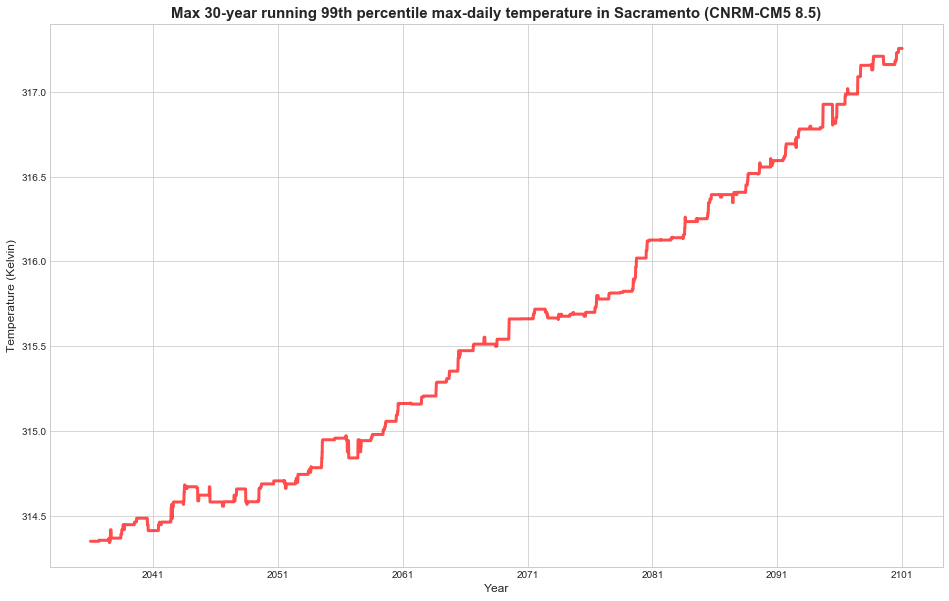

In [16]:
plt.plot(df_daily.index, quant99, color = 'r', ls = 'solid', alpha = 0.7, linewidth = 3.0)
plt.style.use('seaborn-whitegrid')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature (Kelvin)', fontsize = 12)
plt.title('Max 30-year running 99th percentile max-daily temperature in Sacramento (CNRM-CM5 8.5)', weight = 'bold', fontsize = 15)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()